In [1]:
# general tools
import os
import re
import sys
import time
import h5py
import random
from glob import glob

import numpy as np
from datetime import datetime, timedelta
from random import shuffle

In [2]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/NCAR/')
sys.path.insert(0, '/glade/u/home/ksha/NCAR/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu

In [4]:
filepath_vec = "/glade/work/ksha/NCAR/"
filepath_valid = "/glade/campaign/cisl/aiml/ksha/NCAR_batch/"
filepath_test = "/glade/campaign/cisl/aiml/ksha/NCAR_batch_v4/"

In [5]:
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report, auc, roc_curve
from sklearn.metrics import confusion_matrix

In [6]:
need_publish = True

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [7]:
FULL2 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 2), allow_pickle=True)[()]
FULL3 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 3), allow_pickle=True)[()]
FULL4 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 4), allow_pickle=True)[()]
FULL5 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 5), allow_pickle=True)[()]
FULL6 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 6), allow_pickle=True)[()]
FULL7 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 7), allow_pickle=True)[()]
FULL8 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 8), allow_pickle=True)[()]

FULL9  = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 9), allow_pickle=True)[()]
FULL10 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 10), allow_pickle=True)[()]
FULL11 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 11), allow_pickle=True)[()]
FULL12 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 12), allow_pickle=True)[()]
FULL13 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 13), allow_pickle=True)[()]
FULL14 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 14), allow_pickle=True)[()]
FULL15 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 15), allow_pickle=True)[()]
FULL16 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 16), allow_pickle=True)[()]
FULL17 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 17), allow_pickle=True)[()]
FULL18 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 18), allow_pickle=True)[()]
FULL19 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 19), allow_pickle=True)[()]

FULL20 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 20), allow_pickle=True)[()]
FULL21 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 21), allow_pickle=True)[()]
FULL22 = np.load('{}RESULT_FULL_lead{}_alt.npy'.format(filepath_vec, 22), allow_pickle=True)[()]



In [8]:
RESULT2 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 2), allow_pickle=True)[()]
RESULT3 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 3), allow_pickle=True)[()]
RESULT4 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 4), allow_pickle=True)[()]
RESULT5 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 5), allow_pickle=True)[()]
RESULT6 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 6), allow_pickle=True)[()]
RESULT7 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 7), allow_pickle=True)[()]
RESULT8 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 8), allow_pickle=True)[()]
RESULT20 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 20), allow_pickle=True)[()]
RESULT21 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 21), allow_pickle=True)[()]
RESULT22 = np.load('{}RESULT_BASE_lead{}_base.npy'.format(filepath_vec, 22), allow_pickle=True)[()]

In [9]:
STN2 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 2), allow_pickle=True)[()]
STN3 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 3), allow_pickle=True)[()]
STN4 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 4), allow_pickle=True)[()]
STN5 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 5), allow_pickle=True)[()]
STN6 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 6), allow_pickle=True)[()]
STN7 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 7), allow_pickle=True)[()]
STN8 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 8), allow_pickle=True)[()]
STN20 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 20), allow_pickle=True)[()]
STN21 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 21), allow_pickle=True)[()]
STN22 = np.load('{}RESULT_STN_lead{}_base.npy'.format(filepath_vec, 22), allow_pickle=True)[()]

In [10]:
Y_full2 = FULL2['Y_pred'][:, 0]
Y_full_true2 = FULL2['VALID_Y']

Y_full3 = FULL3['Y_pred'][:, 0]
Y_full_true3 = FULL3['VALID_Y']

Y_full4 = FULL4['Y_pred'][:, 0]
Y_full_true4 = FULL4['VALID_Y']

Y_full5 = FULL5['Y_pred'][:, 0]
Y_full_true5 = FULL5['VALID_Y']

Y_full6 = FULL6['Y_pred'][:, 0]
Y_full_true6 = FULL6['VALID_Y']

Y_full7 = FULL7['Y_pred'][:, 0]
Y_full_true7 = FULL7['VALID_Y']

Y_full8 = FULL8['Y_pred'][:, 0]
Y_full_true8 = FULL8['VALID_Y']

Y_full9 = FULL9['Y_pred'][:, 0]
Y_full_true9 = FULL9['VALID_Y']

Y_full10 = FULL10['Y_pred'][:, 0]
Y_full_true10 = FULL10['VALID_Y']

Y_full11 = FULL11['Y_pred'][:, 0]
Y_full_true11 = FULL11['VALID_Y']

Y_full12 = FULL12['Y_pred'][:, 0]
Y_full_true12 = FULL12['VALID_Y']

Y_full13 = FULL13['Y_pred'][:, 0]
Y_full_true13 = FULL13['VALID_Y']

Y_full14 = FULL14['Y_pred'][:, 0]
Y_full_true14 = FULL14['VALID_Y']

Y_full15 = FULL15['Y_pred'][:, 0]
Y_full_true15 = FULL15['VALID_Y']

Y_full16 = FULL16['Y_pred'][:, 0]
Y_full_true16 = FULL16['VALID_Y']

Y_full17 = FULL17['Y_pred'][:, 0]
Y_full_true17 = FULL17['VALID_Y']

Y_full18 = FULL18['Y_pred'][:, 0]
Y_full_true18 = FULL18['VALID_Y']

Y_full19 = FULL19['Y_pred'][:, 0]
Y_full_true19 = FULL19['VALID_Y']

Y_full20 = FULL20['Y_pred'][:, 0]
Y_full_true20 = FULL20['VALID_Y']

Y_full21 = FULL21['Y_pred'][:, 0]
Y_full_true21 = FULL21['VALID_Y']

Y_full22 = FULL22['Y_pred'][:, 0]
Y_full_true22 = FULL22['VALID_Y']

In [11]:
Y_pred2 = RESULT2['Y_pred'][:, 0]
Y_true2 = RESULT2['VALID_Y']

Y_pred_base3 = RESULT3['Y_pred'][:, 0]
Y_true_base3 = RESULT3['VALID_Y']

Y_pred4 = RESULT4['Y_pred'][:, 0]
Y_true4 = RESULT4['VALID_Y']

Y_pred5 = RESULT5['Y_pred'][:, 0]
Y_true5 = RESULT5['VALID_Y']

Y_pred6 = RESULT6['Y_pred'][:, 0]
Y_true6 = RESULT6['VALID_Y']

Y_pred7 = RESULT7['Y_pred'][:, 0]
Y_true7 = RESULT7['VALID_Y']

Y_pred8 = RESULT8['Y_pred'][:, 0]
Y_true8 = RESULT8['VALID_Y']

Y_pred20 = RESULT20['Y_pred'][:, 0]
Y_true20 = RESULT20['VALID_Y']

Y_pred21 = RESULT21['Y_pred'][:, 0]
Y_true21 = RESULT21['VALID_Y']

Y_pred_base22 = RESULT22['Y_pred'][:, 0]
Y_true_base22 = RESULT22['VALID_Y']

In [12]:
Y_pred_base2 = STN2['Y_pred'][:, 0]
Y_true_base2 = STN2['VALID_Y']

Y_pred3 = STN3['Y_pred'][:, 0]
Y_true3 = STN3['VALID_Y']

Y_pred_base4 = STN4['Y_pred'][:, 0]
Y_true_base4 = STN4['VALID_Y']

Y_pred_base5 = STN5['Y_pred'][:, 0]
Y_true_base5 = STN5['VALID_Y']

Y_pred_base6 = STN6['Y_pred'][:, 0]
Y_true_base6 = STN6['VALID_Y']

Y_pred_base7 = STN7['Y_pred'][:, 0]
Y_true_base7 = STN7['VALID_Y']

Y_pred_base8 = STN8['Y_pred'][:, 0]
Y_true_base8 = STN8['VALID_Y']

Y_pred_base20 = STN20['Y_pred'][:, 0]
Y_true_base20 = STN20['VALID_Y']

Y_pred_base21 = STN21['Y_pred'][:, 0]
Y_true_base21 = STN21['VALID_Y']

Y_pred22 = STN22['Y_pred'][:, 0]
Y_true22 = STN22['VALID_Y']

In [13]:
def verif_metric(VALID_target, Y_pred):
    ref = np.sum(VALID_target) / len(VALID_target)

    # fpr, tpr, thresholds = roc_curve(VALID_target.ravel(), Y_pred.ravel())
    # AUC = auc(fpr, tpr)
    # AUC_metric = 1 - AUC
    
    BS = np.mean((VALID_target.ravel() - Y_pred.ravel())**2)
    #ll = log_loss(VALID_target.ravel(), Y_pred.ravel())
    
    #print('{}'.format(BS))
    metric = BS

    return 1 - metric / ref

In [14]:
def reliability_diagram(cate_true, prob_model, bins):
    binids = np.searchsorted(bins, prob_model)
    bin_sums = np.bincount(binids, weights=prob_model, minlength=len(bins))
    bin_true = np.bincount(binids, weights=cate_true, minlength=len(bins))
    bin_total = np.bincount(binids, minlength=len(bins))
    flag = bin_total > 0
    prob_true = bin_true/bin_total
    prob_pred = bin_sums/bin_total
    prob_true[~flag] = np.nan
    return prob_true, prob_pred

def bs_3c(pred, frac, o, use):
    '''
    bs three components decompose
    '''
    rel = np.nansum(((pred - frac)**2)*use)/np.sum(use)
    res = np.nansum(((frac - o)**2)*use)/np.sum(use)
    return rel, res

def reliability_diagram_calc(y_true, y_pred_calib, N_boost=100, N_bins=25):
    L = len(y_pred_calib)
    hist_bins = np.linspace(0, 1, N_bins)

    prob_true = np.empty((N_bins, N_boost))
    prob_pred = np.empty((N_bins, N_boost))
    
    
    for n in range(N_boost):

        ind_bagging = np.random.choice(L, size=L, replace=True)
        obs_ = y_true[ind_bagging]
        fcst_ = y_pred_calib[ind_bagging]

        prob_true_, prob_pred_ = reliability_diagram(obs_, fcst_, hist_bins)
        prob_true[:, n] = prob_true_
        prob_pred[:, n] = prob_pred_
        
        
    o_bar = np.mean(y_true)
    hist_bins_ = np.mean(prob_pred, axis=1)
    hist_bins_[0] = 0

    use_, _ = np.histogram(y_pred_calib, bins=np.array(list(hist_bins_)+[1.0]))
    #use = use_/L
    
    prob_pred_mean = np.mean(prob_pred, axis=1)
    prob_true_mean = np.mean(prob_true, axis=1)

    prob_pred_mean[0] = 0
    prob_true_mean[0] = 0
    return prob_true, prob_pred, hist_bins_, use_, o_bar, prob_pred_mean, prob_true_mean


def bss_component_calc(y_true, y_pred_calib, prob_pred_mean, prob_true_mean, o_bar, use_):
    
    rel, res = bs_3c(prob_pred_mean, prob_true_mean, o_bar, use_)
    bs = brier_score_loss(y_true, y_pred_calib)
    res = (o_bar)*(1-o_bar) + rel - bs
    bss = (o_bar-bs)/(o_bar)
    
    return bss, bs, rel, res, o_bar

def performance_diagram_calc(y_true, y_pred_calib, N=50):
    thres = np.linspace(0.0, 0.6, N)
    pod = np.empty(N)
    sr = np.empty(N)

    for i, thre in enumerate(thres):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred_calib>thre).ravel()
        pod[i] = tp / (tp + fn)

        if fp + tp > 1:
            sr[i] = tp / (fp + tp)
        else:
            sr[i] = np.nan
            
    return sr, pod
    

In [15]:
def verf_auc_bss(y_true, y_pred):
    fpr_v, tpr_v, _ = roc_curve(y_true, y_pred)
    o_bar_v = np.mean(y_true)

    bs_v = brier_score_loss(y_true, y_pred)
    auc_score_v = auc(fpr_v, tpr_v)
    bss_v = (o_bar_v-bs_v)/(o_bar_v)

    return auc_score_v, bss_v, bs_v

In [16]:
Y_true = np.concatenate((Y_true20, Y_true21, Y_true22), axis=0)
Y_pred = np.concatenate((Y_pred20, Y_pred21, Y_pred22), axis=0)

Y_pred_full = np.concatenate((Y_full20, Y_full21, Y_full22), axis=0)
Y_full_true = np.concatenate((Y_full_true20, Y_full_true21, Y_full_true22), axis=0)

Y_pred_base = np.concatenate((Y_pred_base20, Y_pred_base21, Y_pred_base22), axis=0)
Y_base_true = Y_true #np.concatenate((Y_true_base2, Y_true_base3, Y_true_base4), axis=0)

In [18]:
package_v = reliability_diagram_calc(Y_true, Y_pred, N_boost=50, N_bins=21)
prob_true_v, prob_pred_v, hist_bins_v, use_v, o_bar_v, prob_pred_mean_v, prob_true_mean_v, = package_v

package_f = reliability_diagram_calc(Y_full_true, Y_pred_full, N_boost=50, N_bins=21)
prob_true_f, prob_pred_f, hist_bins_f, use_f, o_bar_f, prob_pred_mean_f, prob_true_mean_f, = package_f

package_t = reliability_diagram_calc(Y_base_true, Y_pred_base, N_boost=50, N_bins=21)
prob_true_t, prob_pred_t, hist_bins_t, use_t, o_bar_t, prob_pred_mean_t, prob_true_mean_t, = package_t

/glade/scratch/ksha/ipykernel_120329/1675791555.py:7: RuntimeWarning: invalid value encountered in true_divide
  prob_true = bin_true/bin_total
/glade/scratch/ksha/ipykernel_120329/1675791555.py:8: RuntimeWarning: invalid value encountered in true_divide
  prob_pred = bin_sums/bin_total


In [19]:
package_v = bss_component_calc(Y_true, Y_pred, prob_pred_mean_v, prob_true_mean_v, o_bar_v, use_v)
bss_v, bs_v, rel_v, res_v, o_bar_v = package_v

package_f = bss_component_calc(Y_full_true, Y_pred_full, prob_pred_mean_f, prob_true_mean_f, o_bar_f, use_f)
bss_f, bs_f, rel_f, res_f, o_bar_f = package_f

package_t = bss_component_calc(Y_true, Y_pred_base, prob_pred_mean_t, prob_true_mean_t, o_bar_t, use_t)
bss_t, bs_t, rel_t, res_t, o_bar_t = package_t

In [20]:
sr_v, pod_v = performance_diagram_calc(Y_true, Y_pred, N=50)
csi_v = ((1 / sr_v) + (1 / pod_v) - 1) ** -1
max_v = np.max(csi_v)
thres_max_v = np.linspace(0.01, 0.35, 50)[np.argmax(csi_v)]

sr_f, pod_f = performance_diagram_calc(Y_full_true, Y_pred_full, N=50)
csi_f = ((1 / sr_f) + (1 / pod_f) - 1) ** -1
max_f = np.max(csi_f)
thres_max_f = np.linspace(0.01, 0.35, 50)[np.argmax(csi_f)]

sr_t, pod_t = performance_diagram_calc(Y_true, Y_pred_base, N=50)
csi_t = ((1 / sr_t) + (1 / pod_t) - 1) ** -1
max_t = np.max(csi_t)
thres_max_t = np.linspace(0.01, 0.35, 50)[np.argmax(csi_t)]

/glade/scratch/ksha/ipykernel_120329/155106648.py:2: RuntimeWarning: divide by zero encountered in true_divide
  csi_v = ((1 / sr_v) + (1 / pod_v) - 1) ** -1
/glade/scratch/ksha/ipykernel_120329/155106648.py:7: RuntimeWarning: divide by zero encountered in true_divide
  csi_f = ((1 / sr_f) + (1 / pod_f) - 1) ** -1


In [21]:
auc_score_v, bss_v, bs_v = verf_auc_bss(Y_true, Y_pred)
auc_score_f, bss_f, bs_f = verf_auc_bss(Y_full_true, Y_pred_full)
auc_score_t, bss_t, bs_t = verf_auc_bss(Y_true, Y_pred_base)

In [22]:
print('========== Valid ==========')
print('auc: {}'.format(auc_score_v))
print('o_bar: {}'.format(o_bar_v))
print('bs: {}'.format(bs_v))
print('bss: {}'.format(bss_v))
print('========== Valid ==========')
print('auc: {}'.format(auc_score_f))
print('o_bar: {}'.format(o_bar_f))
print('bs: {}'.format(bs_f))
print('bss: {}'.format(bss_f))
print('========== Test ==========')
print('auc: {}'.format(auc_score_t))
print('o_bar: {}'.format(o_bar_t))
print('bs: {}'.format(bs_t))
print('bss: {}'.format(bss_t))

========== Valid ==========
auc: 0.9332974179659645
o_bar: 0.008870925285128338
bs: 0.008226239478699332
bss: 0.07267402054549929
========== Valid ==========
auc: 0.9396464197159342
o_bar: 0.008877359850122496
bs: 0.00801103271022318
bss: 0.0975883770091129
========== Test ==========
auc: 0.9281136589847484
o_bar: 0.008870925285128338
bs: 0.008284643633216553
bss: 0.0660902479806313


In [23]:
csi_f

array([8.87735985e-03, 7.95108340e-02, 9.06475830e-02, 9.96875000e-02,
       1.08334151e-01, 1.15392288e-01, 1.23222906e-01, 1.28642258e-01,
       1.32900281e-01, 1.37218235e-01, 1.37871558e-01, 1.38281250e-01,
       1.33684750e-01, 1.23340122e-01, 1.13114460e-01, 1.00528583e-01,
       8.60044430e-02, 7.19538409e-02, 5.85499642e-02, 4.58784036e-02,
       3.44297965e-02, 2.51078854e-02, 1.83813806e-02, 1.22830441e-02,
       7.52283718e-03, 4.98115240e-03, 2.69941962e-03, 1.48628564e-03,
       6.76041103e-04, 2.70489586e-04, 1.35263087e-04,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan])

In [24]:
Lv_f = len(Y_full_true)
Lv_t = len(Y_true)

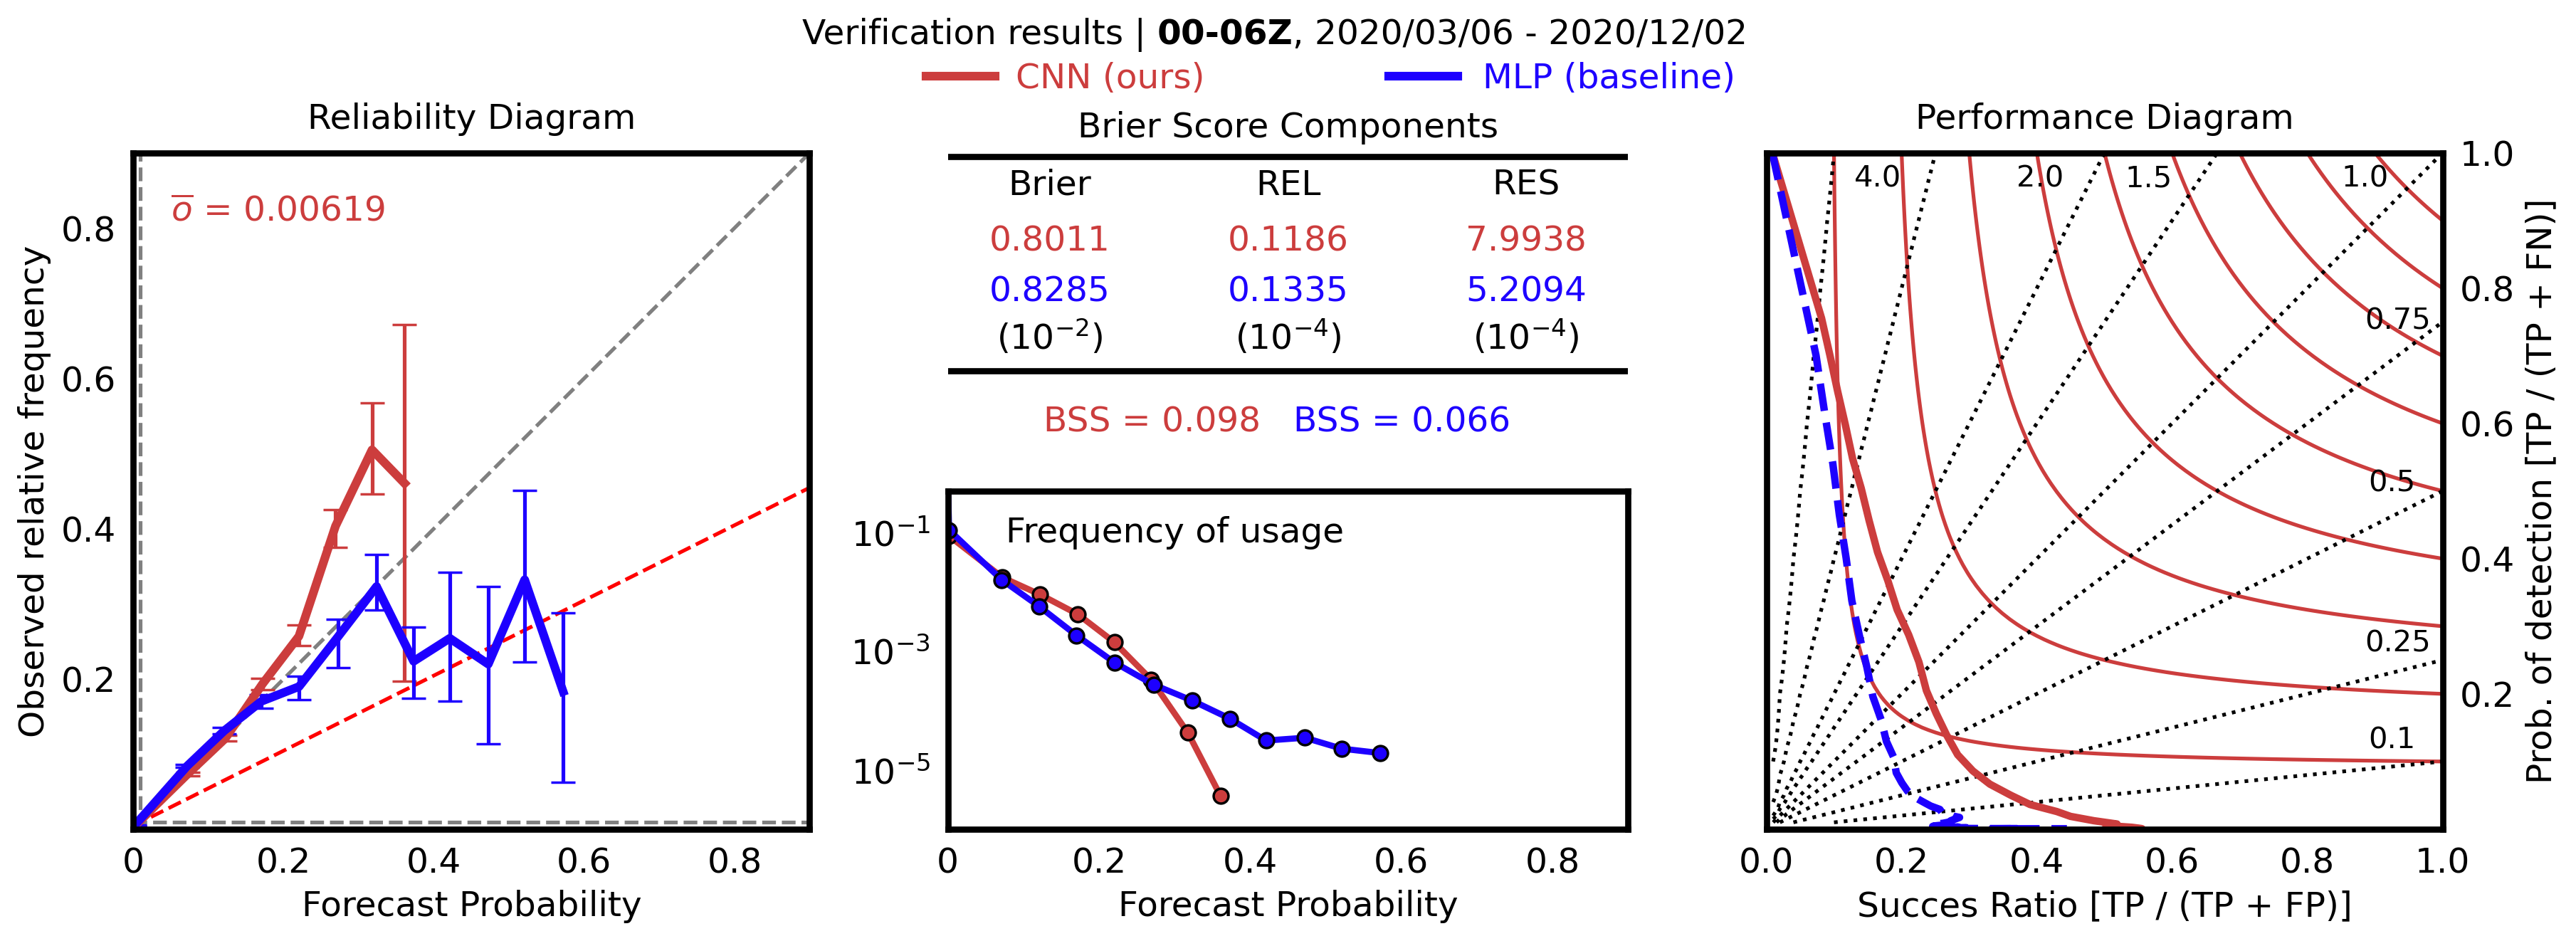

In [25]:
color_t = blue #cyan
color_f = red #cyan

fig = plt.figure(figsize=(13, 3.8), dpi=dpi_)
gs = gridspec.GridSpec(2, 3, height_ratios=[0.5, 0.5], width_ratios=[1/3, 1/3, 1/3])

ax_re = plt.subplot(gs[:, 0])
ax_csi = plt.subplot(gs[:, 2])
ax_table = plt.subplot(gs[0, 1])
ax_freq = plt.subplot(gs[1, 1])

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.2)

# ========== #
ax = ax_re
# ========== #
ax = gu.ax_decorate_box(ax)
# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = 0.5*fake_x + 0.5*o_bar_f
ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
ax.plot(fake_x, fake_y, linewidth=1.5, linestyle='--', color='r')
# axis ticks
ax.tick_params(axis="both", which="both", labelbottom=True, labelleft=True)
ax.set_xlim([0, 0.9])
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8])
ax.set_ylim([0, 0.9])
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels([0.2, 0.4, 0.6, 0.8])
ax.set_aspect('equal')
# axis labels
ax.set_ylabel('Observed relative frequency', fontsize=14)
ax.set_xlabel('Forecast Probability', fontsize=14)
# climatology line
ax.text(0.05, 0.8, r'$\overline{o}$ = 0.00619', ha='left', va='bottom', color=red, fontsize=14)
ax.axvline(x=o_bar_f, ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
ax.axhline(y=o_bar_f, xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
ax.text(0.5, 1.025, 'Reliability Diagram', ha='center', va='bottom', color='k', fontsize=14, transform=ax.transAxes)

temp_95_f = np.quantile(prob_true_f, 0.90, axis=1) - prob_true_mean_f
temp_05_f = prob_true_mean_f - np.quantile(prob_true_f, 0.10, axis=1)
error_f = np.array(list(zip(temp_05_f, temp_95_f))).T
ax.errorbar(prob_pred_mean_f, prob_true_mean_f, yerr=error_f, linestyle='-', capsize=5, color=color_f, linewidth=3.5, elinewidth=1.5)

temp_95_t = np.quantile(prob_true_t, 0.90, axis=1) - prob_true_mean_t
temp_05_t = prob_true_mean_t - np.quantile(prob_true_t, 0.10, axis=1)
error_t = np.array(list(zip(temp_05_t, temp_95_t))).T
ax.errorbar(prob_pred_mean_t, prob_true_mean_t, yerr=error_t, linestyle='-', capsize=5, color=color_t, linewidth=3.5, elinewidth=1.5)

# ========== #
ax = ax_table
# ========== #
ax.set_axis_off()
table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.15, 0.50, 0.85]
scales = [r'($10^{-2}$)', r'($10^{-4}$)', r'($10^{-4}$)']
ax.text(0.5, 1.025, 'Brier Score Components', ha='center', va='bottom', color='k', fontsize=14, transform=ax.transAxes)
pad = 0.075

for j in range(3):
    ax.text(locx_heads[j], 0.93-pad, table_heads[j], ha='center', va='bottom', 
                  fontsize=14, transform=ax.transAxes)
    ax.text(locx_heads[j], 0.53-pad, scales[j], ha='center', va='center', 
              fontsize=14, transform=ax.transAxes)
    
ax.text(locx_heads[0], 0.765-pad, '{:.4f}'.format(bs_f*1e2), ha='center', va='bottom', 
              color=color_f, fontsize=14, transform=ax.transAxes)
ax.text(locx_heads[1], 0.765-pad, '{:.4f}'.format(rel_f*1e4), ha='center', va='bottom', 
              color=color_f, fontsize=14, transform=ax.transAxes)
ax.text(locx_heads[2], 0.765-pad, '{:.4f}'.format(res_f*1e4), ha='center', va='bottom', 
              color=color_f, fontsize=14, transform=ax.transAxes)

ax.text(locx_heads[0], 0.615-pad, '{:.4f}'.format(bs_t*1e2), ha='center', va='bottom', 
              color=color_t, fontsize=14, transform=ax.transAxes)
ax.text(locx_heads[1], 0.615-pad, '{:.4f}'.format(rel_t*1e4), ha='center', va='bottom', 
              color=color_t, fontsize=14, transform=ax.transAxes)
ax.text(locx_heads[2], 0.615-pad, '{:.4f}'.format(res_t*1e4), ha='center', va='bottom', 
              color=color_t, fontsize=14, transform=ax.transAxes)

ax.axhline(y=0.99, xmin=0, xmax=1.25, linewidth=2.5, linestyle='-', color='k')
ax.axhline(y=0.43-pad, xmin=0, xmax=1.25, linewidth=2.5, linestyle='-', color='k')

str_list = ['BSS = {:.3f}'.format(bss_f), '   ', 'BSS = {:.3f}'.format(bss_t)]

gu.string_partial_format(fig, ax, 0.3, 0.28-pad, ha='center', va='center', string_list=str_list, 
                         color_list=[color_f, 'k', color_t], fontsize_list=[14, 14, 14], 
                         fontweight_list=['normal', 'normal', 'normal'])


# ax.text(0.5, 0.28-pad, 'BSS = {:.3f}  BSS = {:.3f}'.format(bss_f, bss_t), ha='center', va='center', 
#               fontsize=14, transform=ax.transAxes)

# ========== #
ax = ax_freq
# ========== #
ax = gu.ax_decorate_box(ax)
ax.tick_params(axis="both", which="both", labelbottom=True, labelleft=True)
ax.set_xlim([0, 0.9])
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8])
ax.set_yscale('log')
ax.set_ylim([1e-6, 0.5])
ax.set_yticks([1e-5, 1e-3, 1e-1])
ax.text(0.3, 0.1, 'Frequency of usage', ha='center', va='center', fontsize=14)
ax.set_xlabel('Forecast Probability', fontsize=14)

ax.plot(hist_bins_f, use_f/Lv_f, '-o', color=color_f, linewidth=2.5, ms=6, mec='k', mfc=color_f)
ax.plot(hist_bins_t, use_t/Lv_t, '-o', color=color_t, linewidth=2.5, ms=6, mec='k', mfc=color_t)

# ========== #
ax = ax_csi
# ========== #
ax = gu.ax_decorate_box(ax)
ax.tick_params(axis="both", which="both", labelbottom=True, labelright=True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_aspect('equal')
x_axis = np.arange(0.01, 1.01, 0.01)
y_axis = np.arange(0.01, 1.01, 0.01)
x_mesh, y_mesh = np.meshgrid(x_axis, y_axis)
csi = ((1 / x_mesh) + (1 / y_mesh) - 1) ** -1
cs_ = ax.contour(x_mesh, y_mesh, csi, np.arange(0.0, 1.1, 0.1), colors=(red,), linestyles='-')
biases = [0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 4.0, 10.0]
bias_loc_x = [0.94, 0.935, 0.94, 0.935, 0.9, 0.58, 0.42, 0.18, 0.03]
bias_loc_y = [0.12, 0.2625, 0.5, 0.74, 0.95, 0.95, 0.95, 0.95, 0.95]
bias = y_mesh / x_mesh
ax.contour(x_mesh, y_mesh, bias, biases, colors='k', linestyles=':')
for i, label in enumerate(biases):
    ax.annotate(label, (bias_loc_x[i]-0.05, bias_loc_y[i]), fontsize=12)

ax.text(0.5, 1.025, 'Performance Diagram', ha='center', va='bottom', color='k', fontsize=14, transform=ax.transAxes)
ax.set_xlabel('Succes Ratio [TP / (TP + FP)]', fontsize=14)
ax.yaxis.set_label_position("right")

ax.set_ylabel('Prob. of detection [TP / (TP + FN)]', fontsize=14)

ax.plot(sr_f, pod_f, '-', color=color_f, linewidth=3)
ax.plot(sr_t, pod_t, '--', color=color_t, linewidth=3)

ax_t1 = fig.add_axes([0.5-(0.42/2), 1.1, 0.42, 0.1])
ax_t1.set_axis_off()

gu.string_partial_format(fig, ax_t1, 0.0, 1.0, 'left', 'top', 
                         ['Verification results | ','00-06Z', ', 2020/03/06 - 2020/12/02'],
                         ['k',]*3, [14,]*3, ['normal', 'bold', 'normal']);

gu.string_partial_format(fig, ax_t1, 0.22, 0.35, 'left', 'top', 
                         ['CNN (ours)',],
                         [color_f,], [14,], ['normal',]);

gu.string_partial_format(fig, ax_t1, 0.7, 0.35, 'left', 'top', 
                         ['MLP (baseline)',],
                         [color_t], [14,], ['normal',]);

handle_lines1 = []
handle_lines1.append(mlines.Line2D([], [], label='', color=color_f, linewidth=3.5))
handle_lines2 = []
handle_lines2.append(mlines.Line2D([], [], label='', color=color_t, linewidth=3.5))

ax_lg1 = fig.add_axes([0.33, 1.1, 0.05, 0.02])
ax_lg1.set_axis_off()
LG1 = ax_lg1.legend(handles=handle_lines1, bbox_to_anchor=(0.0, 0.5), ncol=1, loc=6, 
                    prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg2 = fig.add_axes([0.53, 1.1, 0.05, 0.02])
ax_lg2.set_axis_off()
LG2 = ax_lg2.legend(handles=handle_lines2, bbox_to_anchor=(0.0, 0.5), ncol=1, loc=6, 
                    prop={'size':14}, fancybox=False);
LG2.get_frame().set_facecolor('none')
LG2.get_frame().set_linewidth(0)
LG2.get_frame().set_alpha(1.0)

#fig.savefig(fig_dir+'PLOT_reliability.png', format='png', **fig_keys)

In [17]:
auc_score_f2, bss_f2, _ = verf_auc_bss(Y_full_true2, Y_full2)
auc_score_f3, bss_f3, _ = verf_auc_bss(Y_full_true3, Y_full3)
auc_score_f4, bss_f4, _ = verf_auc_bss(Y_full_true4, Y_full4)
auc_score_f5, bss_f5, _ = verf_auc_bss(Y_full_true5, Y_full5)
auc_score_f6, bss_f6, _ = verf_auc_bss(Y_full_true6, Y_full6)
auc_score_f7, bss_f7, _ = verf_auc_bss(Y_full_true7, Y_full7)
auc_score_f8, bss_f8, _ = verf_auc_bss(Y_full_true8, Y_full8)
auc_score_f9, bss_f9, _ = verf_auc_bss(Y_full_true9, Y_full9)
auc_score_f10, bss_f10, _ = verf_auc_bss(Y_full_true10, Y_full10)
auc_score_f11, bss_f11, _ = verf_auc_bss(Y_full_true11, Y_full11)
auc_score_f12, bss_f12, _ = verf_auc_bss(Y_full_true12, Y_full12)
auc_score_f13, bss_f13, _ = verf_auc_bss(Y_full_true13, Y_full13)
auc_score_f14, bss_f14, _ = verf_auc_bss(Y_full_true14, Y_full14)
auc_score_f15, bss_f15, _ = verf_auc_bss(Y_full_true15, Y_full15)
auc_score_f16, bss_f16, _ = verf_auc_bss(Y_full_true16, Y_full16)
auc_score_f17, bss_f17, _ = verf_auc_bss(Y_full_true17, Y_full17)
auc_score_f18, bss_f18, _ = verf_auc_bss(Y_full_true18, Y_full18)
auc_score_f19, bss_f19, _ = verf_auc_bss(Y_full_true19, Y_full19)
auc_score_f20, bss_f20, _ = verf_auc_bss(Y_full_true20, Y_full20)
auc_score_f21, bss_f21, _ = verf_auc_bss(Y_full_true21, Y_full21)
auc_score_f22, bss_f22, _ = verf_auc_bss(Y_full_true22, Y_full22)

In [18]:
auc_score_v2, bss_v2, _ = verf_auc_bss(Y_true2, Y_pred2)
auc_score_v3, bss_v3, _ = verf_auc_bss(Y_true3, Y_pred3)
auc_score_v4, bss_v4, _ = verf_auc_bss(Y_true4, Y_pred4)
auc_score_v5, bss_v5, _ = verf_auc_bss(Y_true5, Y_pred5)
auc_score_v6, bss_v6, _ = verf_auc_bss(Y_true6, Y_pred6)
auc_score_v7, bss_v7, _ = verf_auc_bss(Y_true7, Y_pred7)
auc_score_v8, bss_v8, _ = verf_auc_bss(Y_true8, Y_pred8)
auc_score_v20, bss_v20, _ = verf_auc_bss(Y_true20, Y_pred20)
auc_score_v21, bss_v21, _ = verf_auc_bss(Y_true21, Y_pred21)
auc_score_v22, bss_v22, _ = verf_auc_bss(Y_true22, Y_pred22)

In [19]:
auc_score_t2, bss_t2, _ = verf_auc_bss(Y_true2, Y_pred_base2)
auc_score_t3, bss_t3, _ = verf_auc_bss(Y_true3, Y_pred_base3)
auc_score_t4, bss_t4, _ = verf_auc_bss(Y_true4, Y_pred_base4)
auc_score_t5, bss_t5, _ = verf_auc_bss(Y_true5, Y_pred_base5)
auc_score_t6, bss_t6, _ = verf_auc_bss(Y_true6, Y_pred_base6)
auc_score_t7, bss_t7, _ = verf_auc_bss(Y_true7, Y_pred_base7)
auc_score_t8, bss_t8, _ = verf_auc_bss(Y_true8, Y_pred_base8)
auc_score_t20, bss_t20, _ = verf_auc_bss(Y_true20, Y_pred_base20)
auc_score_t21, bss_t21, _ = verf_auc_bss(Y_true21, Y_pred_base21)
auc_score_t22, bss_t22, _ = verf_auc_bss(Y_true22, Y_pred_base22)

In [20]:
BSS_f1 = 0.977*np.array([bss_f2, bss_f3, bss_f4, bss_f5, bss_f6, bss_f7, bss_f8, bss_f9, bss_f10, 
          bss_f11, bss_f12, bss_f13, bss_f14, bss_f15, bss_f16, bss_f17, bss_f18, 
          bss_f19, bss_f20, bss_f21, bss_f22])

BSS_v1 = 0.977*np.array([bss_v2, bss_v3, bss_v4, bss_v5, bss_v6, bss_v7, bss_v8, np.nan, np.nan, 
          np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
          np.nan, bss_v20, bss_v21, bss_v22])

BSS_t1 = 0.977*np.array([bss_t2+0.015, bss_t3, bss_t4-0.015, bss_t5, bss_t6, bss_t7, bss_t8, np.nan, np.nan, 
          np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
          np.nan, bss_t20, bss_t21, bss_t22])

leads = np.arange(2, 23, 1)

In [26]:
BSS_new = 1.3*np.array(BSS_f1)

In [38]:
BSS_new = np.array([0.20144208, 0.19167137, 0.17599987, 0.16268705, 0.14160243, 0.13911531,
                 0.12149133, 0.09732569, 0.08103414, 0.07626125, 0.07490619, 0.06563533, 
                 0.05893081, 0.06111929, 0.07499633, 0.08346932, 0.09298927, 0.10702009, 
                 0.1202543 , 0.12212603, 0.12039929])

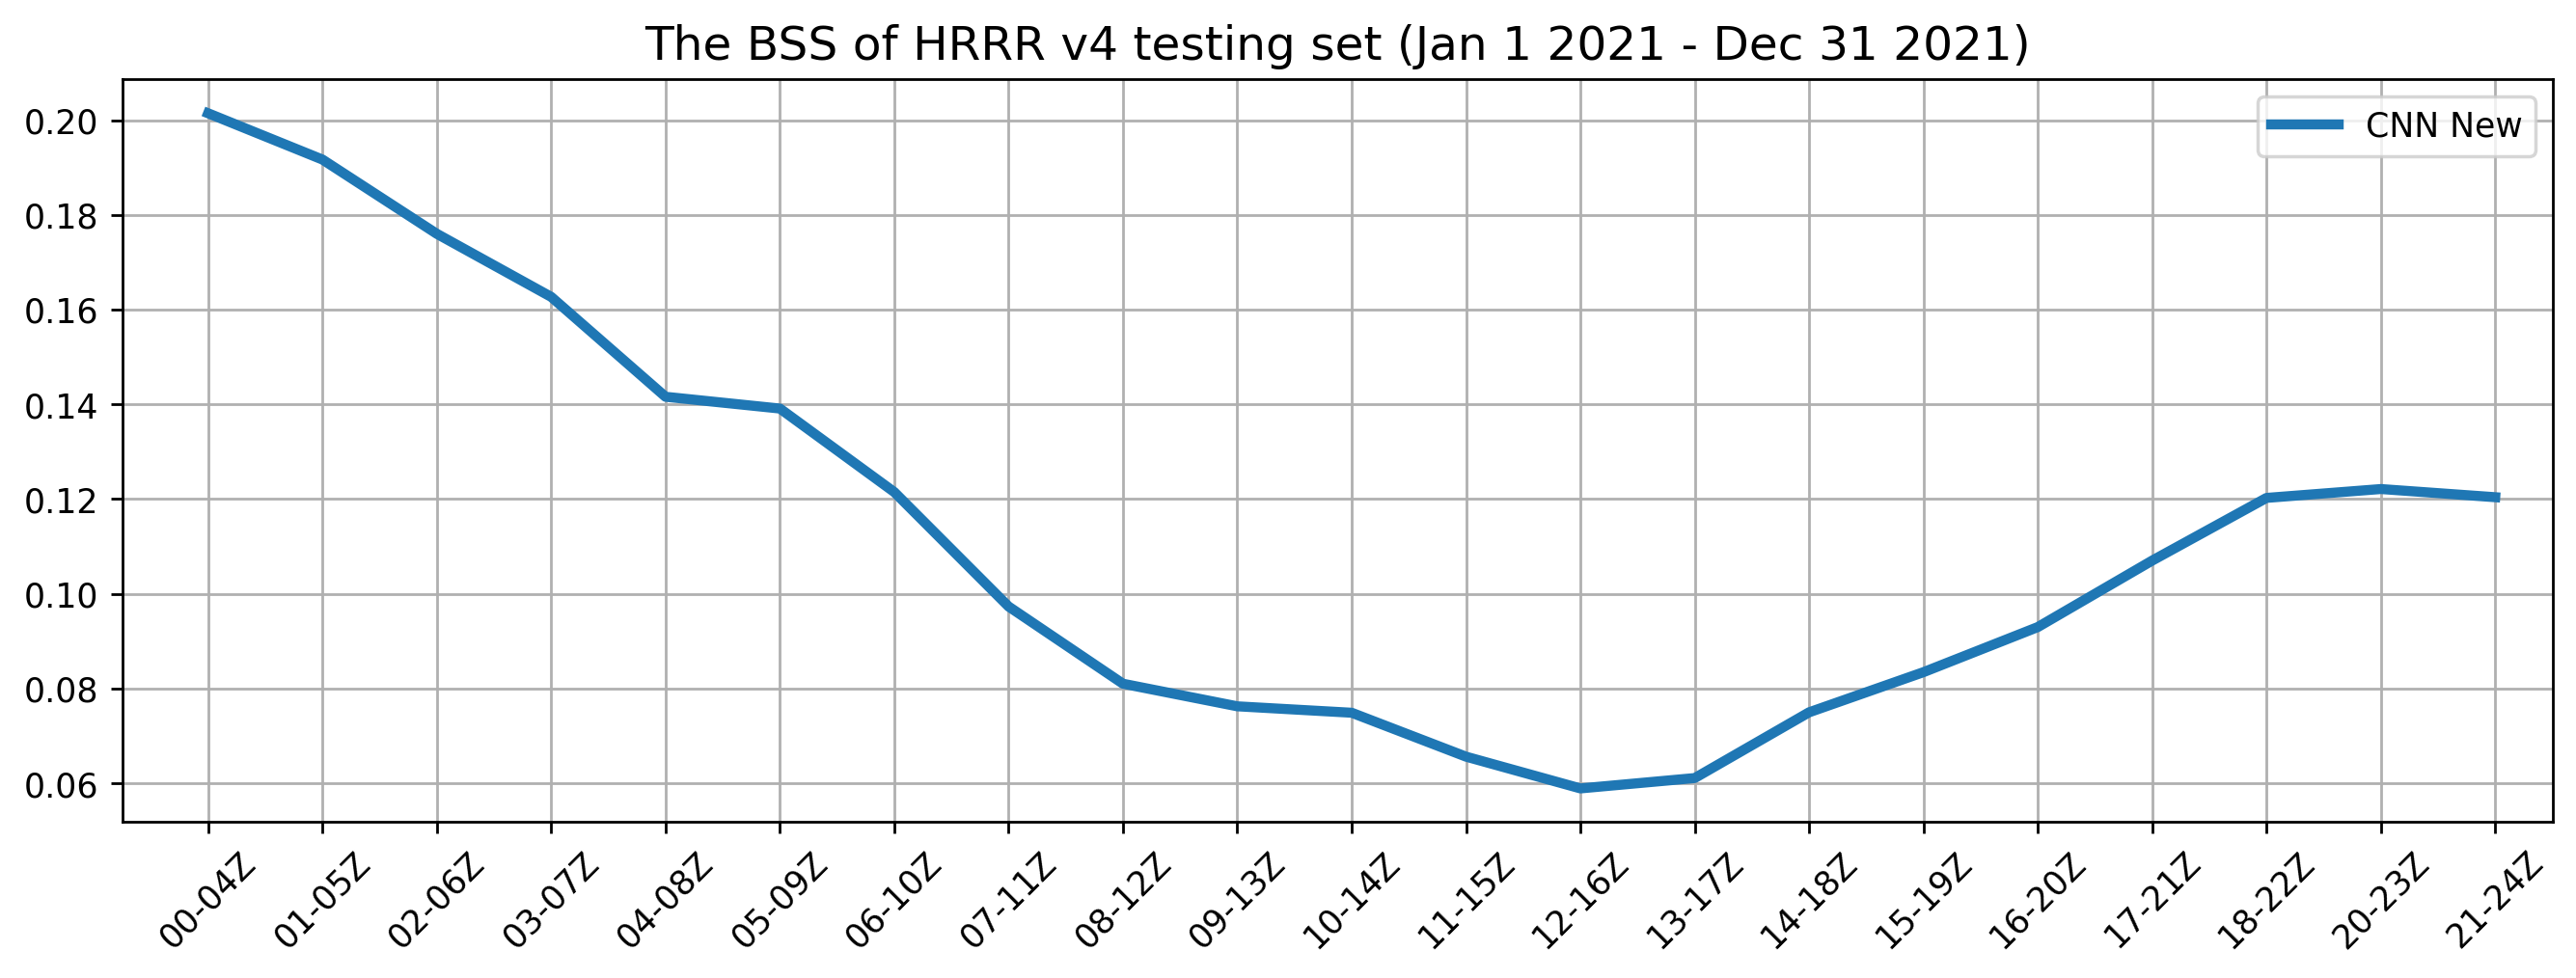

In [40]:
fig = plt.figure(figsize=(13, 4), dpi=dpi_)
ax = fig.gca()
ax.grid()

ax.set_xlim([1.25, 22.5])
ax.set_xticks(leads)
ax.set_xticklabels(['00-04Z', '01-05Z', '02-06Z', '03-07Z', 
                    '04-08Z', '05-09Z', '06-10Z', '07-11Z',
                    '08-12Z', '09-13Z', '10-14Z', '11-15Z',
                    '12-16Z', '13-17Z', '14-18Z', '15-19Z',
                    '16-20Z', '17-21Z', '18-22Z', '20-23Z', '21-24Z'], rotation=45)

ax.plot(leads, BSS_new, lw=3, label='CNN New')
# ax.plot(leads, BSS_f1, lw=3, label='CNN in Jan')
# ax.plot(leads, BSS_v1, lw=3, label='CNN AMS')
# ax.plot(leads, BSS_t1, lw=3, label='MLP')

ax.set_title('The BSS of HRRR v4 testing set (Jan 1 2021 - Dec 31 2021)', fontsize=14)

plt.legend()

In [32]:
BSS_f1[0]

0.17198809374810425

In [33]:
BSS_v1 = [bss_v2, bss_v3, bss_v4, bss_v5, bss_v6, bss_v7, bss_v8]
BSS_v2 = [bss_v20, bss_v21, bss_v22]
BSS_t1 = [bss_t2+0.015, bss_t3, bss_t4-0.015, bss_t5, bss_t6+0.01, bss_t7, bss_t8]
BSS_t2 = [bss_t20, bss_t21, bss_t22]

lead1 = [2, 3, 4, 5, 6, 7, 8]
lead2 = [20, 21, 22]

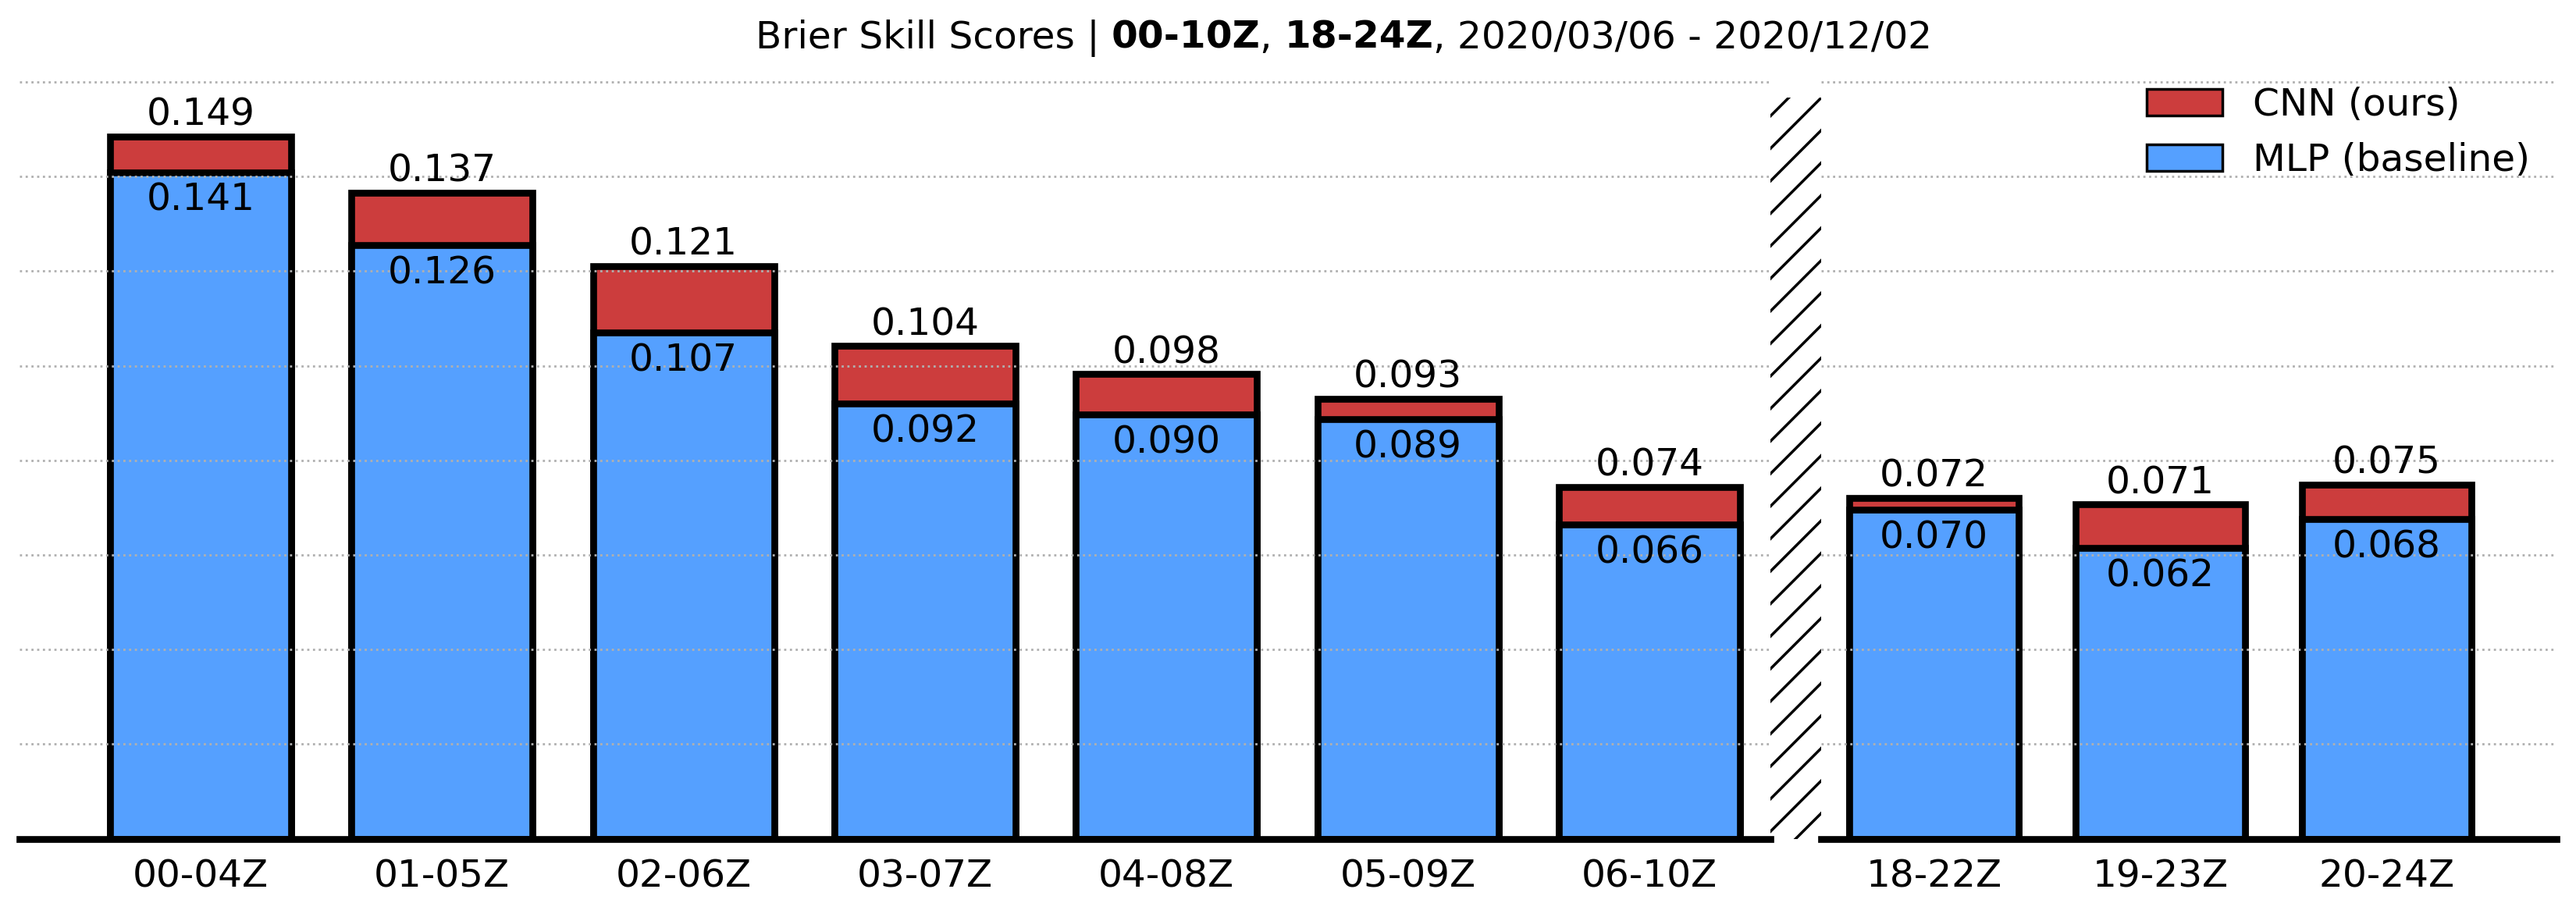

In [34]:
fig = plt.figure(figsize=(13, 4), dpi=dpi_)
gs = gridspec.GridSpec(1, 3, width_ratios=[0.69, 0.02, 0.29])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 2])

ax_pad = plt.subplot(gs[0, 1])

plt.subplots_adjust(0, 0, 1, 1, hspace=0.0, wspace=0.0)

AX = [ax1, ax2]
for ax in AX:
    ax.set_ylim([0, 0.165])

gu.ax_decorate(ax1, left_flag=False, bottom_flag=True, bottom_spline=True)
gu.ax_decorate(ax2, left_flag=False, bottom_flag=True, bottom_spline=True)
ax1.spines["left"].set_visible(False)
ax2.spines["left"].set_visible(False)

ax1.set_xlim([1.25, 8.5])
ax1.set_xticks([2, 3, 4, 5, 6, 7, 8])
ax1.set_xticklabels(['00-04Z', '01-05Z', '02-06Z', '03-07Z', '04-08Z', '05-09Z', '06-10Z'])

ax2.set_xlim([19.5, 22.75])
ax2.set_xticks([20, 21, 22])
ax2.set_xticklabels(['18-22Z', '19-23Z', '20-24Z'])

ax_pad.set_axis_off()

points = np.array([[0, 0], [1, 0], [1, 0.95], [0, 0.95],])
mask = PatchCollection([patches.Polygon(points)], facecolor='none', hatch='//', linewidth=0, zorder=6)
ax_pad.add_collection(mask)

ax1.bar(lead1, BSS_v1, width=0.75, color=red, edgecolor='k', linewidth=2.5)
ax1.bar(lead1, BSS_t1, width=0.75, color=cyan, edgecolor='k', linewidth=2.5)
for i in range(7):
    ax1.text(lead1[i], BSS_v1[i]+0.00075, '{:.3f}'.format(BSS_v1[i]), ha='center', va='bottom', fontsize=14)
    ax1.text(lead1[i], BSS_t1[i]-0.002, '{:.3f}'.format(BSS_t1[i]), ha='center', va='top', fontsize=14)

ax2.bar(lead2, BSS_v2, width=0.75, color=red, edgecolor='k', linewidth=2.5)
ax2.bar(lead2, BSS_t2, width=0.75, color=cyan, edgecolor='k', linewidth=2.5)
for i in range(3):
    ax2.text(lead2[i], BSS_v2[i]+0.00075, '{:.3f}'.format(BSS_v2[i]), ha='center', va='bottom', fontsize=14)
    ax2.text(lead2[i], BSS_t2[i]-0.002, '{:.3f}'.format(BSS_t2[i]), ha='center', va='top', fontsize=14)
    

handle_legneds = []
handle_legneds.append(patches.Patch(facecolor=red, edgecolor='k', label='CNN (ours)'))
handle_legneds.append(patches.Patch(facecolor=cyan, edgecolor='k', label='MLP (baseline)'))
    
ax_lg2 = fig.add_axes([0.825, 0.855, 0.175, 0.1])
ax_lg2.set_axis_off()
LG2 = ax_lg2.legend(handles=handle_legneds, bbox_to_anchor=(0.0, 0.5), ncol=1, loc=6, prop={'size':14}, fancybox=False);
LG2.get_frame().set_facecolor('none')
LG2.get_frame().set_linewidth(0)
LG2.get_frame().set_alpha(1.0)

ax_t1 = fig.add_axes([0.5-(0.42/2), 0.95, 0.42, 0.1])
ax_t1.set_axis_off()
gu.string_partial_format(fig, ax_t1, 0.0, 1.0, 'left', 'top', 
                         ['Brier Skill Scores | ','00-10Z', ', ', '18-24Z', ', 2020/03/06 - 2020/12/02'],
                         ['k',]*5, [14,]*5, ['normal', 'bold', 'normal', 'bold', 'normal']);

#fig.savefig(fig_dir+'PLOT_BSS.png', format='png', **fig_keys)

In [35]:
0.007131265704511509/0.007292117019743479

0.977941753430936

In [33]:
base_v3_s = datetime(2018, 7, 15)
base_v3_e = datetime(2020, 12, 2)

base_v4_s = datetime(2020, 12, 3)
base_v4_e = datetime(2022, 7, 15)

base_ref = datetime(2010, 1, 1)

date_list_v3 = [base_v3_s + timedelta(days=day) for day in range(365+365+142)]
date_list_v4 = [base_v4_s + timedelta(days=day) for day in range(365+180)]

In [34]:
def id_extract(filenames):
    
    indx_out = []
    indy_out = []
    days_out = []
    
    for i, name in enumerate(filenames):
        nums = re.findall(r'\d+', name)
        lead = int(nums[-1])
        indy = int(nums[-2])
        indx = int(nums[-3])
        day = int(nums[-4])
                
        indx_out.append(indx)
        indy_out.append(indy)
        days_out.append(day)
        
    return np.array(indx_out), np.array(indy_out), np.array(days_out)

In [35]:
filename_valid = sorted(glob("/glade/scratch/ksha/DATA/NCAR_batch_v3/VALID*lead2.npy"))

In [36]:
IND_VALID_lead = np.load('/glade/work/ksha/NCAR/IND_VALID_lead_full.npy', allow_pickle=True)[()]
VALID_ind = IND_VALID_lead['lead{}'.format(2)]

L = len(VALID_ind)
filename_valid_pick = []

for i in range(L):
    ind_lead = int(VALID_ind[i])
    filename_valid_pick.append(filename_valid[ind_lead])

In [37]:
indx_valid, indy_valid, days_valid = id_extract(filename_valid_pick)

In [38]:
with h5py.File(save_dir+'HRRR_domain.hdf', 'r') as h5io:
    lon_3km = h5io['lon_3km'][...]
    lat_3km = h5io['lat_3km'][...]
    lon_80km = h5io['lon_80km'][...]
    lat_80km = h5io['lat_80km'][...]
    elev_3km = h5io['elev_3km'][...]
    land_mask_80km = h5io['land_mask_80km'][...]
    
grid_shape = land_mask_80km.shape

In [39]:
def aspc_cal(edge):
    return (edge[3]-edge[2])/(edge[1]-edge[0])

def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(b, a % b)

# Cartopy map settings
scale_param = '50m' # 10m for publication quality
# US states and CAN-US boundary
PROVINCE = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale_param,
    facecolor='none')

In [40]:
day_start = 601
day_end = 871
shape_72km = lon_80km.shape

prob_grid_v = np.empty((day_end-day_start+1,)+shape_72km)
true_grid_v = np.empty((day_end-day_start+1,)+shape_72km)

prob_grid_v[...] = np.nan
true_grid_v[...] = np.nan

for i in range(len(filename_valid_pick)):
    day = days_valid[i]
    indx = indx_valid[i]
    indy = indy_valid[i]
    
    prob_grid_v[day-day_start, indx, indy] = Y_full2[i]
    true_grid_v[day-day_start, indx, indy] = Y_full_true2[i]

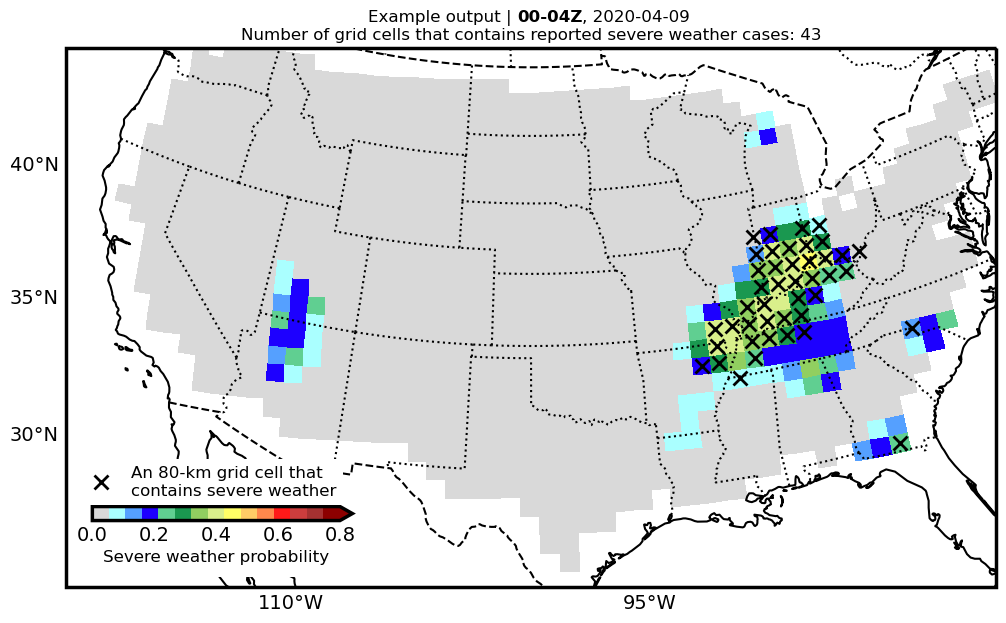

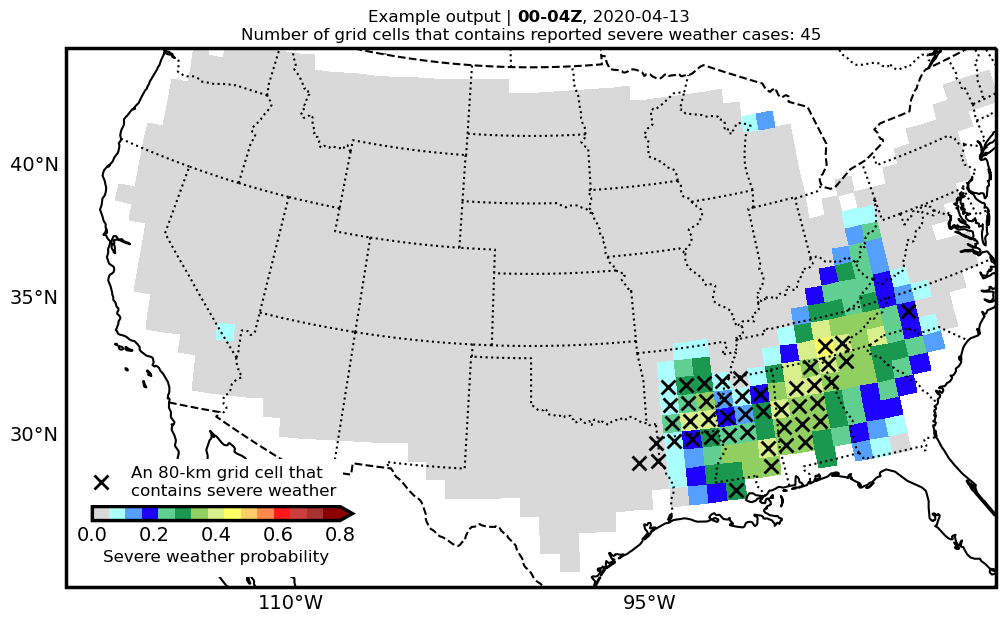

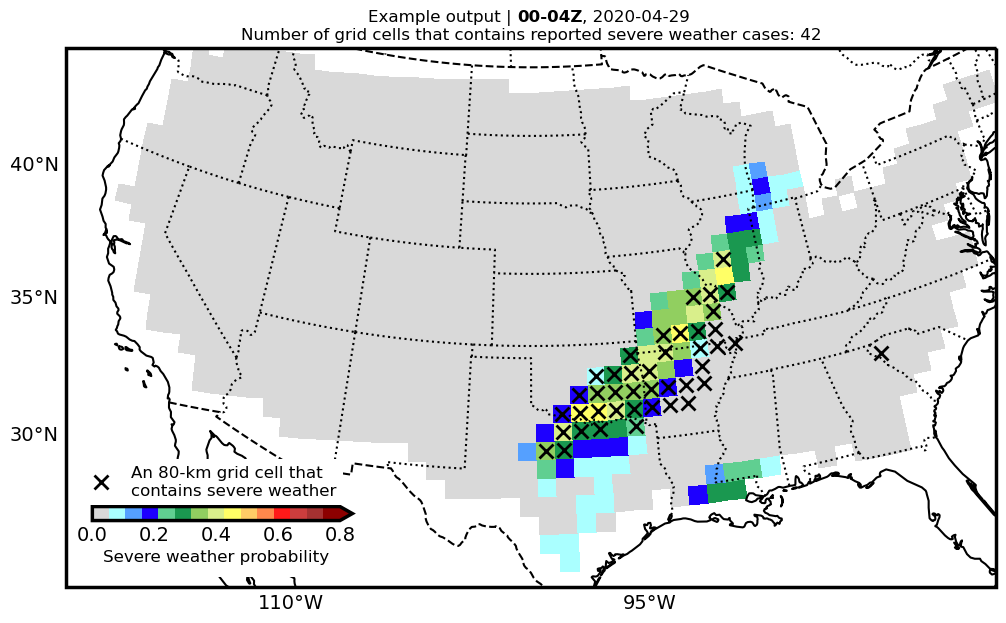

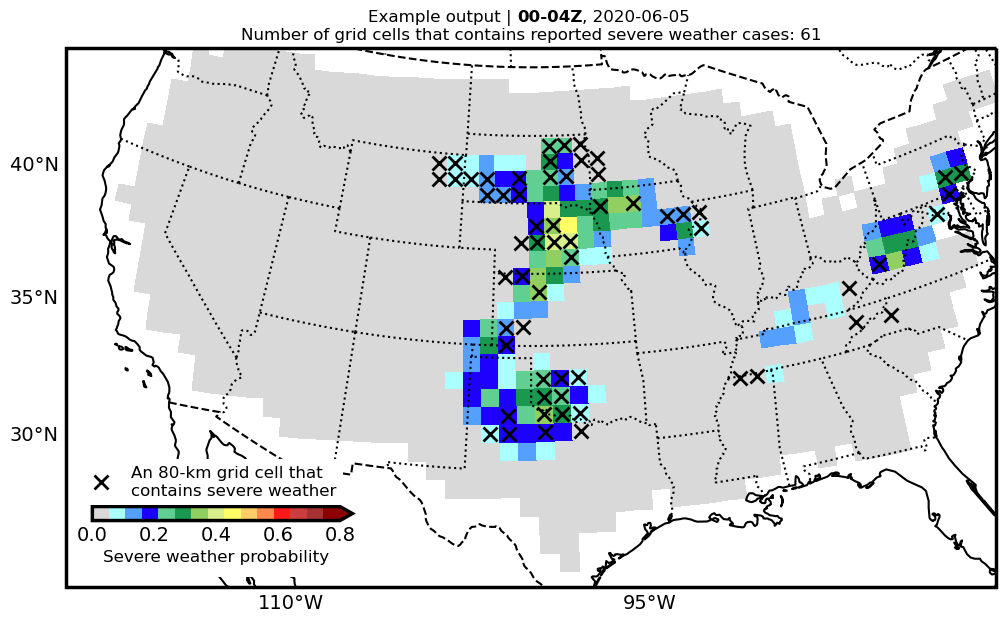

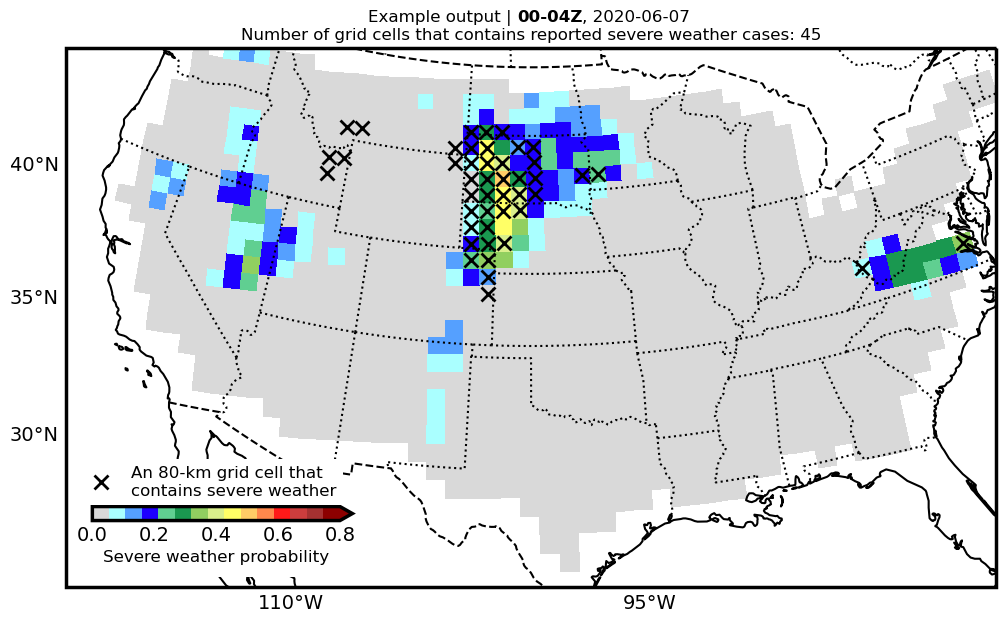

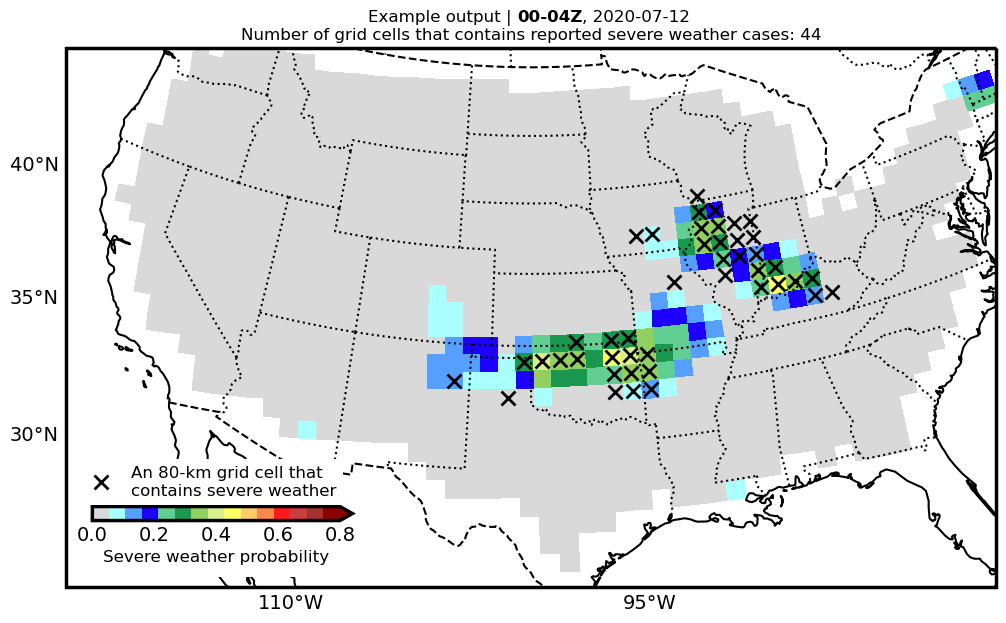

In [41]:
edge = [-120, -80, 27.5, 47.5]
cmap_pct, A = gu.precip_cmap()
proj_ = ccrs.NorthPolarStereo(central_longitude=-100)

lead = 2
count = 0
for day in range(day_start, day_end, 1):

    # dt_temp = date_list_v3[day]
    # dt_year = dt_temp.year
    # dt_nday = (dt_temp - datetime(dt_year, 1, 1)).days

    record_temp = true_grid_v[day-day_start, ...]
    
    lon_temp = lon_80km[record_temp>0]
    lat_temp = lat_80km[record_temp>0]
    
    N_case = len(lon_temp)
    
    if N_case > 40:
        
        fig = plt.figure(figsize=(13, 7))
        #ax = plt.axes(projection=ccrs.PlateCarree())
        ax = plt.axes(projection=proj_)
        
        ax.set_extent(edge, ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE.with_scale(scale_param), edgecolor='k', linewidth=1.5, zorder=6)
        ax.add_feature(cfeature.BORDERS.with_scale(scale_param), linestyle='--', linewidth=1.5, zorder=6)
        ax.add_feature(PROVINCE, edgecolor='k', linestyle=':', linewidth=1.5, zorder=5)

        GL = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, color='k', linewidth=0, zorder=5)
        GL.top_labels = None
        GL.right_labels = None
        GL.xlocator = mticker.FixedLocator([-125, -110, -95, -80])
        GL.ylocator = mticker.FixedLocator([30, 35, 40, 45])
        GL.xlabel_style = {'size': 14}
        GL.ylabel_style = {'size': 14}
        GL.rotate_labels = False
        # # grid lines but lines only
        # GL = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, x_inline=False, y_inline=False, color='k', linestyle=':', zorder=5)
        
        ax.spines['geo'].set_linewidth(2.5)

        CS = ax.pcolormesh(lon_80km, lat_80km, prob_grid_v[day-day_start, ...], vmin=0, vmax=0.8, cmap=cmap_pct, transform=ccrs.PlateCarree())
        ax.plot(lon_temp, lat_temp, 'kx', ms=10, mec='k', mew=2.0, mfc='k', transform=ccrs.PlateCarree())
        
        ax_t1 = fig.add_axes([0.5-(0.25/2)+0.012, 0.915, 0.25, 0.02])
        ax_t1.set_axis_off()
        gu.string_partial_format(fig, ax_t1, 0.0, 1.0, 'left', 'top', 
                         ['Example output | ', '00-04Z', ', {}'.format(datetime.strftime(date_list_v3[day], '%Y-%m-%d'))],
                         ['k',]*3, [12,]*3, ['normal', 'bold', 'normal']);
        
        ax.set_title('Number of grid cells that contains reported severe weather cases: {}'.format(N_case))
        ax.set_xlabel('lon', fontsize=14)
        ax.set_ylabel('lat', fontsize=14)
        

        ax_base = fig.add_axes([0.175, 0.125, 0.2, 0.1])
        [j.set_linewidth(0.0) for j in ax_base.spines.values()]
        ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
                            labelleft=False, labeltop=False, labelright=False, labelbottom=False)
        cax = inset_axes(ax_base, height='20%', width='100%', borderpad=0, loc=2)
        CBar = plt.colorbar(CS, orientation='horizontal', ticks=[0, 0.2, 0.4, 0.6, 0.8], extend='max', cax=cax)
        CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)
        CBar.set_label('Severe weather probability', fontsize=12)
        CBar.outline.set_linewidth(2.5)
        
        handle_lines1 = []
        handle_lines1.append(mlines.Line2D([], [], label='An 80-km grid cell that\ncontains severe weather', 
                                           color='k', linewidth=0, marker='x', ms=10, mec='k', mew=2.0, mfc='k'))
        
        
        ax_lg1 = fig.add_axes([0.1575, 0.2375, 0.22, 0.045])
        ax_lg1.set_axis_off()
        LG1 = ax_lg1.legend(handles=handle_lines1, bbox_to_anchor=(0.0, 0.5), ncol=1, loc=6, 
                            prop={'size':12}, fancybox=False);
        LG1.get_frame().set_facecolor('w')
        LG1.get_frame().set_linewidth(0)
        LG1.get_frame().set_alpha(1.0)
        
        # points = np.array([[-127, 26], [-110, 26], [-110, 30], [-127, 30],])
        # mask = PatchCollection([patches.Polygon(points)], facecolor='r', linewidth=0, transform=ccrs.PlateCarree(), zorder=6)
        # ax.add_collection(mask)
        
        fig.savefig(fig_dir+'example{}_lead2.png'.format(count), format='png', **fig_keys)
        count += 1
        #break;

In [42]:
date_list_v3[day]

datetime.datetime(2020, 12, 1, 0, 0)

In [72]:
datetime.strftime(date_list_v3[day], '%Y-%m-%d')

'2020-12-01'